In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# sns.set(style="whitegrid")
# sns.set(style="ticks")
sns.set()

In [72]:
data = pd.read_csv('SAT_and_GPA.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


### critical thinking

- **Process**
    - user gets GPA at university after SAT scores!. 
    So we can _predict_ **GPA from SAT**. But SAT from GPA is nonsense!
- **Omitted Variable Bias** : 
    - attandance, income, gender etc. are also important for GPA. That means _we may need additional variables_ to make a better prediction (R-square=40% and Adjusted R-Square)
    - any critical _categorical variable_ which effects prediction critically
- **Critical checkpoints for the predicted function**
    - GPA can **not exceed 5.00** , 
    - SAT can **not exceed 2400** 

In [73]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### data discovery

- 84 line means, it is **sample**, not population.
- Descriptive stats: Although _mode_ and _median_ is missing,
    - SAT min, max and mean seams ok. seems no outliers. 
    - GPA min and max and mean seams ok. no outliers. 
    - skew=0.04 and correlation.coeeficient=0.637 is missing
- histogram is missing.
- in plotter below, there seems a lineer relation b/w SAT vs GPA. But,
    - R-square=%40, that means we may need other variables to increase that number
    - p-value for x1(SAT) is 0, which means significantly predictor

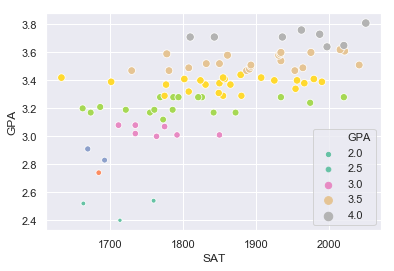

In [79]:
ax = sns.scatterplot(x='SAT', y='GPA', hue='GPA', size='GPA', palette='Set2', data=data)


In [75]:
# we need OLS w/ constant **for lineer regression**
x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.20e-11
Time:                        14:58:47   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### lineer function

y(GPA) = 0.2750 + 0.0017 * x1(SAT)

- const.p-value=0.503 > 0.05, but it is not important as x1(SAT)'s p-value.
- x1(SAT)'s p-value=0.000 <0.05, it is ok for 95% Confidence Interval ! That means SAT is significantly different from zero.


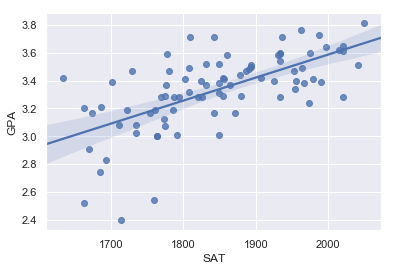

In [77]:
sns.regplot(x="SAT", y="GPA", data=data);
# sns.lmplot(x="SAT", y="GPA", col='SAT', data=data);
